### quest
- apply() : '신장', '체중' -> BMI
- BMI 시각화 및 인사이트

- BMI = 체중(kg) / (신장(m) * 신장(m))
  저체중 (Underweight): BMI 18.5 미만
  정상 체중 (Normal Weight): BMI 18.5 - 24.9
  과체중 (Overweight): BMI 25 - 29.9
  비만 (Obese): BMI 30 이상

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
1890,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1891,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0
1892,1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,...,2,32.2,11.1,17.7,0,NaN,1972.50,5,Down,0


In [2]:
df_ROS.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [3]:
# BMI = 체중(kg) / (신장(m) * 신장(m))
df_ROS_BMI = df_ROS [['환자ID','신장','체중']]
df_ROS_BMI[:10]

,환자ID,신장,체중
0,1PT,163,60.3
1,2PT,171,71.7
2,3PT,178,77.1
3,4PT,174,74.2
4,5PT,183,80.7
5,6PT,164,60.8
6,7PT,175,74.8
7,8PT,183,81.2
8,9PT,168,69.2
9,10PT,160,63.0


In [4]:
df_ROS_BMI.describe()

,신장,체중
count,1894.000000,1894.000000
mean,168.027983,68.111140
std,9.211419,11.234318
min,140.000000,35.000000
25%,161.000000,59.700000
50%,169.000000,68.000000
75%,175.000000,75.000000
max,204.000000,136.100000


In [5]:
df_ROS_BMI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   환자ID    1894 non-null   object 
 1   신장      1894 non-null   int64  
 2   체중      1894 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 44.5+ KB


In [36]:
# BMI 계산 함수, 신장 int -> float으로 Type casting
def Calculate_BMI(row):
    height = float(row['신장']) / 100 
    weight = float(row['체중'])
    BMI = weight / (height * height)
    return BMI

In [43]:
# BMI 계산 및 범주 할당
df_ROS_BMI['BMI'] = df_ROS_BMI.apply(Calculate_BMI, axis=1)
df_ROS_BMI['BMI']

C:\Users\04-02\AppData\Local\Temp\ipykernel_10852\4136818685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_BMI['BMI'] = df_ROS_BMI.apply(Calculate_BMI, axis=1)


0       22.695623
1       24.520365
2       24.334049
3       24.507861
4       24.097465
          ...    
1889    25.964542
1890    23.936062
1891    25.099502
1892    24.577867
1893    17.361111
Name: BMI, Length: 1894, dtype: float64

In [48]:
pd.pivot_table(data=df_ROS_BMI[['BMI', '환자ID']], index='BMI', aggfunc=len)

,환자ID
BMI,
14.479500,1
16.127207,1
16.906171,2
17.224804,2
17.361111,2
...,...
34.220041,1
34.492232,2
35.491690,2


<Axes: xlabel='BMI'>

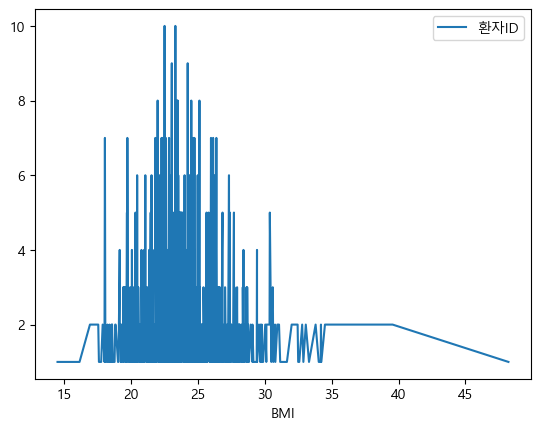

In [47]:
pd.pivot_table(data=df_ROS_BMI[['BMI', '환자ID']], index='BMI', aggfunc=len).plot(kind='line')

In [ ]:
df_ROS_BMI['BMI_범주'] = pd.cut(df_ROS_BMI['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')],
                               labels=['저체중', '정상 체중', '과체중', '비만'])

In [41]:
# BMI 범주별 빈도수 계산
df_ROS_BMI_counts = df_ROS_BMI['BMI_범주'].value_counts()
df_ROS_BMI_counts

정상 체중    1365
과체중       428
비만         63
저체중        38
Name: BMI_범주, dtype: int64

In [42]:
# 문자열로 변환한 신장과 체중 열
df_ROS_BMI['신장'] = df_ROS_BMI['신장'].astype(str)
df_ROS_BMI['체중'] = df_ROS_BMI['체중'].astype(str)

C:\Users\04-02\AppData\Local\Temp\ipykernel_10852\1354724796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_BMI['신장'] = df_ROS_BMI['신장'].astype(str)
C:\Users\04-02\AppData\Local\Temp\ipykernel_10852\1354724796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_BMI['체중'] = df_ROS_BMI['체중'].astype(str)


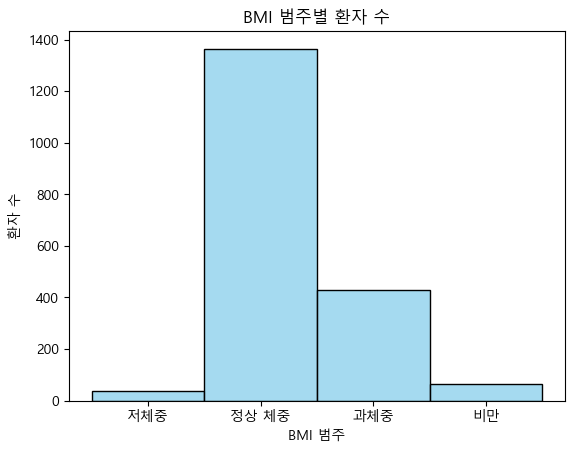

In [51]:
# BMI 시각화
sns.histplot(data=df_ROS_BMI, x='BMI_범주', color='skyblue')
plt.title('BMI 범주별 환자 수')
plt.xlabel('BMI 범주')
plt.ylabel('환자 수')
plt.show()

### 분석결과 

1. 정상 체중 범주에 속하는 환자가 가장 많았다. 총 1365명이 이 범주에 속하며, 정상 체중을 유지하고 있는 환자들이 대부분이다.

2. 과체중 범주에 속하는 환자가 428명으로 그 다음으로 많았다. 일부 환자들은 과체중에 해당되며, 신체적으로 더 많은 관리가 필요할 수 있다. 

3. 비만 범주에 해당하는 환자는 63명으로 상대적으로 적은 수이다. 하지만 이러한 환자들에게는 건강 상태를 관리하고 개선하기 위한 조치가 필요할 수 있다.

4. 저체중 범주에 해당하는 환자는 38명으로 가장 적은 수이다. 저체중 환자들 또한 신체적인 건강을 유지하고 개선하기 위한 적절한 접근 방법이 필요할 수 있다.

   결과를 통해 환자들의 체중 분포와 비만도 상태를 파악할 수 있으며, 이를 토대로 건강 관리와 조치를  계획할 수 있다. 